In [1]:
using Plots
using BoundaryValueDiffEq
using QuadGK
using PhysicalConstants.CODATA2018
using Unitful

# Lucas Schmidt Ferreira de Araujo

## Problem 01

$$ y'' -\lambda k(t) y = 0 , \quad k(t) = (1+t^2)^2 $$

$$ y(0) = 0, \quad y'(0) = 1 $$

Let's supose a solution of the kind

$$ y(t) = e^{ \sqrt{ \lambda } u(t)} $$

$$ y'(t) = \sqrt{ \lambda } u'(t) e^{ \sqrt{\lambda} u(t)}$$

$$ y''(t) = \sqrt{\lambda} u''(t) e^{ \sqrt{\lambda} u(t)} + \lambda (u'(t))^2 e^{ \sqrt{\lambda} u(t)} $$

$$ \sqrt{\lambda} u''(t) e^{ \sqrt{\lambda} u(t)} + \lambda (u'(t))^2 e^{ \sqrt{\lambda} u(t)} - \lambda k(t) e^{ \sqrt{\lambda} u(t)} = 0  $$

Defining $\epsilon = \frac{\sqrt{\lambda}}{\lambda} << 1$, we have

$$ \epsilon u'' + (u')^2 -  k(t) = 0  $$

Defining $ u'(t) = v(t) $

$$ \epsilon v' + v^2 - k(t) = 0 $$

Applying the regular pertubation method, we have

$$ v(t) = v_0(t) + \epsilon v_1(t) + O(\epsilon^3) $$

$$ v'(t) = v_0'(t) + \epsilon v_1'(t)$$

$$ \epsilon( v_0' + \epsilon v_1') + (v_0 + \epsilon v_1)^2 - k(t) = 0 $$

### $\epsilon^0$ 

$$ v_0^2(t) - k(t) = 0 \implies v_0(t) = \pm \sqrt{k(t)} = \pm (1+t^2)$$

### $\epsilon^1$

$$ v_0' + 2v_0v_1 = 0 \implies v_1(t) = -\frac{1}{2}\frac{v_0'}{v_0} = -\frac{t}{(1+t^2)} $$

Then we have

$$ u'_1(t) = v_1(t) = (1+t^2) - \epsilon \frac{t}{1+t^2} \implies u_1(t) - u_1(0) = t + \frac{t^3}{3} - \frac{\epsilon}{2} ln(1+t^2) $$

$$ u'_2(t) = v_2(t) = -(1+t^2) - \epsilon \frac{t}{1+t^2} \implies u_2(t) - u_2(0) = -(t + \frac{t^3}{3}) - \frac{\epsilon}{2} ln(1+t^2) $$

### Final Solution

By the WKB approximation, the final solution is given by

$$ y_{\text{WKB}} = C_1 exp( \sqrt{\lambda}u_1(t) ) + C_2 exp( \sqrt{\lambda}u_2(t) ) $$

From I.C 

$$ C_1 + C_2 = 0$$

$$ C_1 \sqrt{\lambda} u_1'(0) + C_1 \sqrt{\lambda} u_2'(0) = 1 $$

Since $u'_2(0) = -u'_1(0) = -1$, we have

$$ C_2 = -C_1 = -\frac{1}{2\sqrt{\lambda}}$$

$$ y_{\text{WKB}} = \frac{1}{2\sqrt{\lambda}} exp(\sqrt{\lambda}(t + \frac{t^3}{3} -  \frac{\epsilon}{2} ln(1+t^2))) - \frac{1}{2\sqrt{\lambda}} exp(-\sqrt{\lambda}(-(t + \frac{t^3}{3}) -  \frac{\epsilon}{2} ln(1+t^2)))$$

In [2]:
function y_wkb(t,λ)
    ϵ = √λ / λ
    u1 = t + t^3 /3 - .5 * ϵ * log(1+t^2)
    u2 = -(t + t^3 /3) - .5 * ϵ * log(1+t^2)
    c1 = 1/(2*√λ)
    c2 = -c1
    return c1 * exp( √λ * u1 ) + c2 * exp( √λ * u2 )
end

y_wkb (generic function with 1 method)

In [3]:
### Numerical Solution
function k(t)
    return (1+t^2)^2
end

function ODE!(du, u, p, t)
    λ = p[1]
    y, dydt = u 
    du[1] = dydt
    du[2] = λ * k(t) * y
end

# Boundary conditions
function BC!(residual, u, p, t)
    residual[1] = u[1][1] 
    residual[2] = u[1][2] - 1  
end

BC! (generic function with 1 method)

In [4]:
xspan = (0.0, 1.0) 
initial_guess = [0.0, 0.0]      

λ = 20                   
bvp = BVProblem(ODE!, BC!, initial_guess, xspan, [λ])
sol = solve(bvp, MIRK4() , dt = 0.01 )

t = sol.t
y       = [q[1] for q in sol.u]
dydt    = [q[2] for q in sol.u];

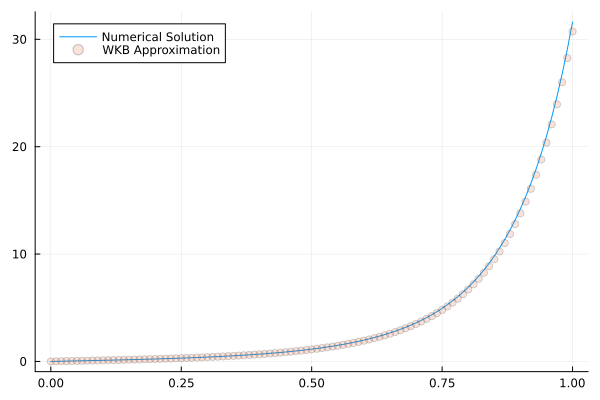

In [5]:
plot(t,y,label = "Numerical Solution")
scatter!(t,y_wkb.(t,λ),label = "WKB Approximation" , α = .2)

## Problem 02

$$ y'' + \lambda k(t) y = 0 , \quad k(t) = (\pi + x)^4$$

$$ y(0) = 0 ,\quad y(\pi) = 0$$

From previous exercice, if we define $\epsilon = \frac{\sqrt{\lambda}}{\lambda} << 1$ and

$$ y(t) = e^{ \sqrt{ \lambda } u(t)} $$

We have 

$$ \epsilon u'' + (u')^2 +  k(t) = 0  $$

If $ u'(t) = v(t) $, we have

$$ \epsilon v'(t) + v(t)^2 + k(t) = 0 $$

Applying the regular pertubation method, we have

$$ v(t) = v_0(t) + \epsilon v_1(t) + O(\epsilon^3) $$

$$ v'(t) = v_0'(t) + \epsilon v_1'(t)$$

$$ \epsilon( v_0' + \epsilon v_1') + (v_0 + \epsilon v_1)^2 + k(t) = 0 $$

### $\epsilon^0$ 

$$ v_0^2(t) - k(t) = 0 \implies v_0(t) = \pm \sqrt{k(t)}i = \pm ( \pi + t )^2 i$$

### $\epsilon^1$

$$ v_0' + 2v_0v_1 = 0 \implies v_1(t) = -\frac{1}{2}\frac{v_0'}{v_0} = - \frac{1}{(\pi + t)} $$

Then

$$ u_1'(t) = v_1(t) = (\pi + t)^2i - \frac{\epsilon}{\pi +t} $$

$$ u_1(t) = \int_0^t i(\pi + s)^2 ds - \int_0^t \frac{\epsilon}{\pi +s}ds $$

$$ u_1(t) = \frac{i}{3}(\pi + t)^3 - \epsilon ln( \pi + t) $$

$$ u_2(t) = -\frac{i}{3}(\pi + t)^3 - \epsilon ln( \pi + t)$$

From the WKB approximation, the solution is given by

$$ y_{\text{WKB}}(t) = C_1 exp( \sqrt{\lambda} u_1(t) ) + C_2 exp( \sqrt{\lambda} u_2(t) ) $$ 

$$ = \frac{C_1}{\pi +t} exp(\theta(t)i) + \frac{C_2}{\pi +t}exp(-\theta(t)i) $$

Where

$$ \theta(t) = \frac{\sqrt{\lambda}}{3}(\pi + t)^3 - \frac{\sqrt{\lambda}\pi^3}{3}$$

The real solutions are given by

$$ y_{\text{WKB}}(x) = \frac{C_1}{\pi +t}cos(\theta(t)) + \frac{C_2}{\pi +t}sin(\theta(t)) $$

From B.C

$$ y_{\text{WKB}}(0) = C_1 cos(0) + C_2 sin(0) \implies C_1 = 0 $$

Also

$$ y_{\text{WKB}}(\pi) = C_2 sin( \theta(\pi) ) \implies \theta(2\pi) = k\pi $$

Then

$$ \frac{7\sqrt{\lambda}\pi^3}{3} = k\pi \implies \lambda = \frac{9k^2}{49 \pi^4} $$

The eigenfunctions are

$$ y_{\text{WKB}}(x) = \frac{C_2}{\pi +t}sin(\theta(t)) $$


In [6]:
### Numerical Solution
function ODE!(du, u, p, t)
    λ = p[1]
    y, dydt = u 
    k = (π + t)^4
    du[1] = dydt
    du[2] = -λ * k * y
end

# Boundary conditions
function BC!(residual, u, p, t)
    residual[1] = u[: , 1][1] - 0.0
    residual[2] = u[: , end][1]- 0.0 
end

function y_wkb(t)
    θ = √λ * (π + t)^3 / 3 - √λ * (π)^3 / 3
    return sin( θ ) / ( π + t)
end

xspan = (0.0, π) 
initial_guess = [0.5, 0.5]      

λ = 9*10^2 / (49*π^4)
bvp = BVProblem(ODE!, BC!, initial_guess, xspan, [λ])
sol = solve(bvp, MIRK4() , dt = 0.01 )

t = sol.t
y = [q[1] for q in sol.u];

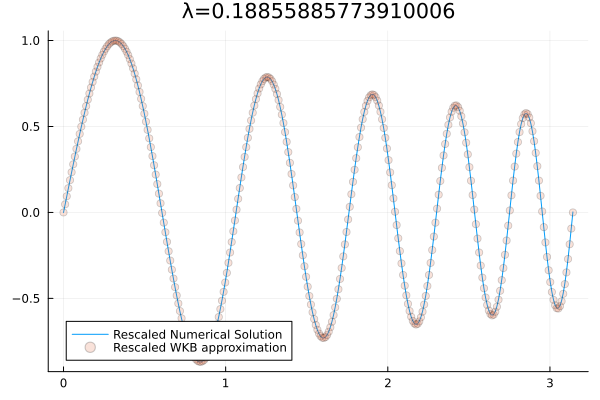

In [7]:
plot( t,y/maximum(y) , label = "Rescaled Numerical Solution" , title = "λ=$(λ)")
scatter!(t , y_wkb.(t) / maximum(y_wkb.(t)) , label = "Rescaled WKB approximation" , alpha = .2)

## Problem 03

We have the differential equation

$$ y'' + p(x) y' + q(x) y = 0 $$

First we define $ v = \frac{y'}{y} $ and note that

$$ \frac{y''}{y} = v' + v^2 $$

Then

$$ v' + v^2 + p(x)v + q(x) = 0 $$

$$ v' + (v+\frac{p(x)}{2})^2 + q(x) - \frac{p(x)^2}{4}= 0 $$

Defining $s = v+\frac{p(x)}{2} , r(x) =  - \frac{p'(x)}{2} - \frac{p(x)^2}{4} + q(x)$

$$ s' + s^2 + r(x) = 0$$

Multipluing by the Integrating Factor

$$ \mu(x)s'(x) + \mu(x)s^2 + r(x)\mu(x) = 0 $$

$$ (\mu s)' + r(x)\mu = 0 $$

Where we want that

$$ \mu' = \mu s \implies \mu(x) = exp(\int s(x)dx) = exp( \int \frac{y'}{y}dx ) exp(\frac{1}{2} \int p(x)dx )  $$

$$ \mu(x) = y(x) exp(\frac{1}{2} \int p(x)dx ) $$

Then

$$ \mu(x)'' + r(x)\mu(x) = 0 $$

## Problem 04

The Schrodinger equation

$$-\frac{\hbar^2}{2 m} \psi^{\prime \prime}(x)+V(x) \psi(x)=E \psi(x), \quad -\infty<x<+\infty $$

Can be rewriten as

$$\psi^{\prime \prime}(x)+ \lambda \kappa(x) \psi(x)=0 , \quad \lambda = \frac{2 m}{\hbar^2} >> 1$$

With

$$ \kappa(x) = (E-V(x)) $$

* 1.a) $\kappa(x) = -k(t) < 0 , \quad V(x) > E$ 

$$ \psi^{\prime \prime}(x) -  \lambda k(x) \psi(x)=0 $$

$$ \psi(0) = \psi(a) = 0$$

From exercice 1, we have

$$ \psi_{\text{WKB}}(x) = C_1 exp( \sqrt{\lambda}u_1(x) ) + C_2 exp( \sqrt{\lambda}u_2(x) ) $$

$$ u_1(x) = \int_0^x \sqrt{k(s)} ds - \frac{\epsilon}{4} ln(k(x)) $$

$$ u_2(x) = \int_0^x -\sqrt{k(s)} ds - \frac{\epsilon}{4} ln(k(x)) $$

$$ \psi_{\text{WKB}}(x) = C_1 k^{-\epsilon/4} exp(\int_0^x \sqrt{\lambda k(s)} ds) + C_2 k^{-\epsilon/4} exp(-\int_0^x \sqrt{\lambda k(s)} ds)$$


* 1.b) $\kappa(x) = k(t) > 0 , \quad V(x) < E$ 

$$ \psi^{\prime \prime}(x) + \lambda k(x) \psi(x)=0 $$

$$ \psi(0) = \psi(a) = 0$$

$$ \psi_{\text{WKB}} = C_1 exp( \sqrt{\lambda}u_1(x) ) + C_2 exp( \sqrt{\lambda}u_2(x) ) $$

$$ u_1(x) = \int_0^x i\sqrt{k(s)} ds - \frac{\epsilon}{4} ln(k(x)) $$

$$ u_2(x) = \int_0^x -i\sqrt{k(s)} ds - \frac{\epsilon}{4} ln(k(x)) $$

$$ \psi_{\text{WKB}}(x) = C_1 k^{-\sqrt{\lambda}/4\lambda} cos(\int_0^x \sqrt{\lambda k(s)} ds) + C_2 k^{-\sqrt{\lambda}/4\lambda} sin(\int_0^x \sqrt{\lambda k(s)} ds)$$

From the first B.C, we have

$$ \psi_{\text{WKB}}(0) \implies C_1 = 0$$

$$ \psi_{\text{WKB}}(\pi) \implies \int_0^a \sqrt{\lambda k(s)} ds = k\pi$$

$$ E_k = \frac{k^2\pi^2}{\lambda a^2} $$

In [17]:
### Numerical Solution
function k(x)
    return E
end

function Integrand(s)
    return (λ * k(x))^.5 
end

function ODE!(du, u, p, x)
    λ = p[1]
    y, dydx = u 
    du[1] = dydx
    du[2] = -λ * k(x) * y
end

# Boundary conditions
function BC!(residual, u, p, x)
    residual[1] = u[: , 1][1] - 0.0
    residual[2] = u[: , end][1]- 0.0 
end

function y_wkb(x)
    return sin( quadgk( Integrand , 0 , x)[1] ) * k(x)^(-√λ / (4*λ))
end

me = ustrip( CODATA2018.m_e ) 
ħ = ustrip( CODATA2018.h ) / (2π) 
a = 1
λ = 2*me / ħ^2
E = 10^2 * π^2 / (λ * a^2)
xspan = (0.0, 1) 
initial_guess = [0.5, 0.5]      
bvp = BVProblem(ODE!, BC!, initial_guess, xspan, [λ])
sol = solve(bvp, MIRK4() , dt = 0.01 )

x = sol.t
y = [q[1] for q in sol.u];

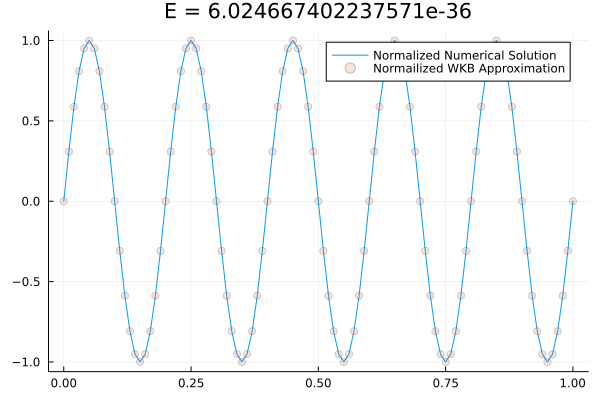

In [20]:
plot(x , y / maximum(y) , label = "Normalized Numerical Solution" )
scatter!(x, y_wkb.(x) / maximum(y_wkb.(x)) , label = "Normailized WKB Approximation" , alpha = .2)
title!("E = $(E)")